In this notebook, we will make some decisions on which forcing terms that we want to use for our case study and why.


I want to do ssp245 and ssp585

ssp245 is the middle of the road scenario where we expect a radiative forcing of 4.5 W/m^2 by 2100

ssp585 is the extreme top boundary condition where we are still heavily reliant on fossil fuels to develop our economy.

In [1]:
import xarray as xr
xr.set_options(display_style='html')
import intake
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import cartopy.crs as ccrs
import cartopy

In [2]:
# cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
# col = intake.open_esm_datastore(cat_url)
# col.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
...,...,...,...,...,...,...,...,...,...,...,...
514813,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
514814,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tauu,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
514815,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hur,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
514816,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hus,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207


In [3]:
# cmipdf = col.df
# cmipdf['experiment_id'].unique()

array(['highresSST-present', 'piControl', 'control-1950', 'hist-1950',
       'historical', 'amip', 'abrupt-4xCO2', 'abrupt-2xCO2',
       'abrupt-0p5xCO2', '1pctCO2', 'ssp585', 'esm-piControl', 'esm-hist',
       'hist-piAer', 'histSST-1950HC', 'ssp245', 'hist-1950HC', 'histSST',
       'piClim-2xVOC', 'piClim-2xNOx', 'piClim-2xdust', 'piClim-2xss',
       'piClim-histall', 'hist-piNTCF', 'histSST-piNTCF',
       'aqua-control-lwoff', 'piClim-lu', 'histSST-piO3', 'piClim-CH4',
       'piClim-NTCF', 'piClim-NOx', 'piClim-O3', 'piClim-HC',
       'faf-heat-NA0pct', 'ssp370SST-lowCH4', 'piClim-VOC',
       'ssp370-lowNTCF', 'piClim-control', 'piClim-aer', 'hist-aer',
       'faf-heat', 'faf-heat-NA50pct', 'ssp370SST-lowNTCF',
       'ssp370SST-ssp126Lu', 'ssp370SST', 'ssp370pdSST', 'histSST-piAer',
       'piClim-ghg', 'piClim-anthro', 'faf-all', 'hist-nat', 'hist-GHG',
       'ssp119', 'piClim-histnat', 'piClim-4xCO2', 'ssp370',
       'piClim-histghg', 'highresSST-future', 'esm-ssp585-

In [4]:
# data_subset = col.search(table_id="Amon", variable_id = "pr", source_id = ["CanESM5", "HadGEM3-GC31-MM", "GISS-E2-1-H"], experiment_id = ['ssp245', 'ssp585'])
# dset_dict = data_subset.to_dataset_dict(zarr_kwargs={'consolidated':True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [5]:
# dset_dict.keys()

dict_keys(['ScenarioMIP.NASA-GISS.GISS-E2-1-H.ssp585.Amon.gn', 'ScenarioMIP.MOHC.HadGEM3-GC31-MM.ssp585.Amon.gn', 'ScenarioMIP.NASA-GISS.GISS-E2-1-H.ssp245.Amon.gn', 'ScenarioMIP.CCCma.CanESM5.ssp245.Amon.gn', 'ScenarioMIP.CCCma.CanESM5.ssp585.Amon.gn'])

## Getting model data

Here we read in the projected datasets that we want.

In [8]:
# can_dset = dset_dict['ScenarioMIP.CCCma.CanESM5.ssp245.Amon.gn']
# can_bc_dset_45 = can_dset.sel(lon = slice(225.,239.0625), lat = slice(48.835241, 59.99702))
# can_dset = dset_dict['ScenarioMIP.CCCma.CanESM5.ssp585.Amon.gn']
# can_bc_dset_85 = can_dset.sel(lon = slice(225.,239.0625), lat = slice(48.835241, 59.99702))

# had_dset = dset_dict['ScenarioMIP.MOHC.HadGEM3-GC31-MM.ssp585.Amon.gn']
# had_dset = had_dset.sel(lon = slice(225.4, 239.6), lat = slice(48.835241, 59.99702))

# gis_dset = dset_dict['ScenarioMIP.NASA-GISS.GISS-E2-1-H.ssp245.Amon.gn']
# gis_dset_45 = gis_dset.sel(lon = slice(226.25, 238.75), lat = slice(48.835241, 59.99702))
# gis_dset = dset_dict['ScenarioMIP.NASA-GISS.GISS-E2-1-H.ssp585.Amon.gn']
# gis_dset_85 = gis_dset.sel(lon = slice(226.25, 238.75), lat = slice(48.835241, 59.99702))

## Re-gridding the data

Use the code from the re-grid notebook

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import os
fp = r"C:\Users\13432\miniconda3\envs\a448\Library\lib\esmf.mk"
os.environ['ESMFMKFILE'] = fp
import xesmf as xe
import cartopy

In [11]:
can_dset = xr.open_dataset('can_bc_dset.nc')
ds_output = xr.Dataset(
    {
        'lat': (['lat'], can_dset.lat.to_numpy(), {'units': 'degrees_north'}),
        'lon': (['lon'], can_dset.lon.to_numpy(), {'units': 'degrees_east'}),
    }
)

ds_output

<xarray.Dataset> Size: 72B
Dimensions:  (lat: 3, lon: 6)
Coordinates:
  * lat      (lat) float64 24B 51.63 54.42 57.21
  * lon      (lon) float64 48B 225.0 227.8 230.6 233.4 236.2 239.1
Data variables:
    *empty*

In [13]:
regridder = xe.Regridder(had_dset, ds_output, "conservative")
had_out = regridder(had_dset.pr, keep_attrs=True)

<xarray.DataArray 'pr' (member_id: 4, dcpp_init_year: 1, time: 1032, lat: 3,
                        lon: 6)> Size: 297kB
dask.array<astype, shape=(4, 1, 1032, 3, 6), dtype=float32, chunksize=(1, 1, 113, 3, 6), chunktype=numpy.ndarray>
Coordinates:
  * time            (time) object 8kB 2015-01-16 00:00:00 ... 2100-12-16 00:0...
  * member_id       (member_id) object 32B 'r1i1p1f3' 'r2i1p1f3' ... 'r4i1p1f3'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
  * lat             (lat) float64 24B 51.63 54.42 57.21
  * lon             (lon) float64 48B 225.0 227.8 230.6 233.4 236.2 239.1
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        includes both liquid and solid phases
    long_name:      Precipitation
    original_name:  mo: (stash: m01s05i216, lbproc: 128)
    standard_name:  precipitation_flux
    units:          kg m-2 s-1
    regrid_method:  conservative

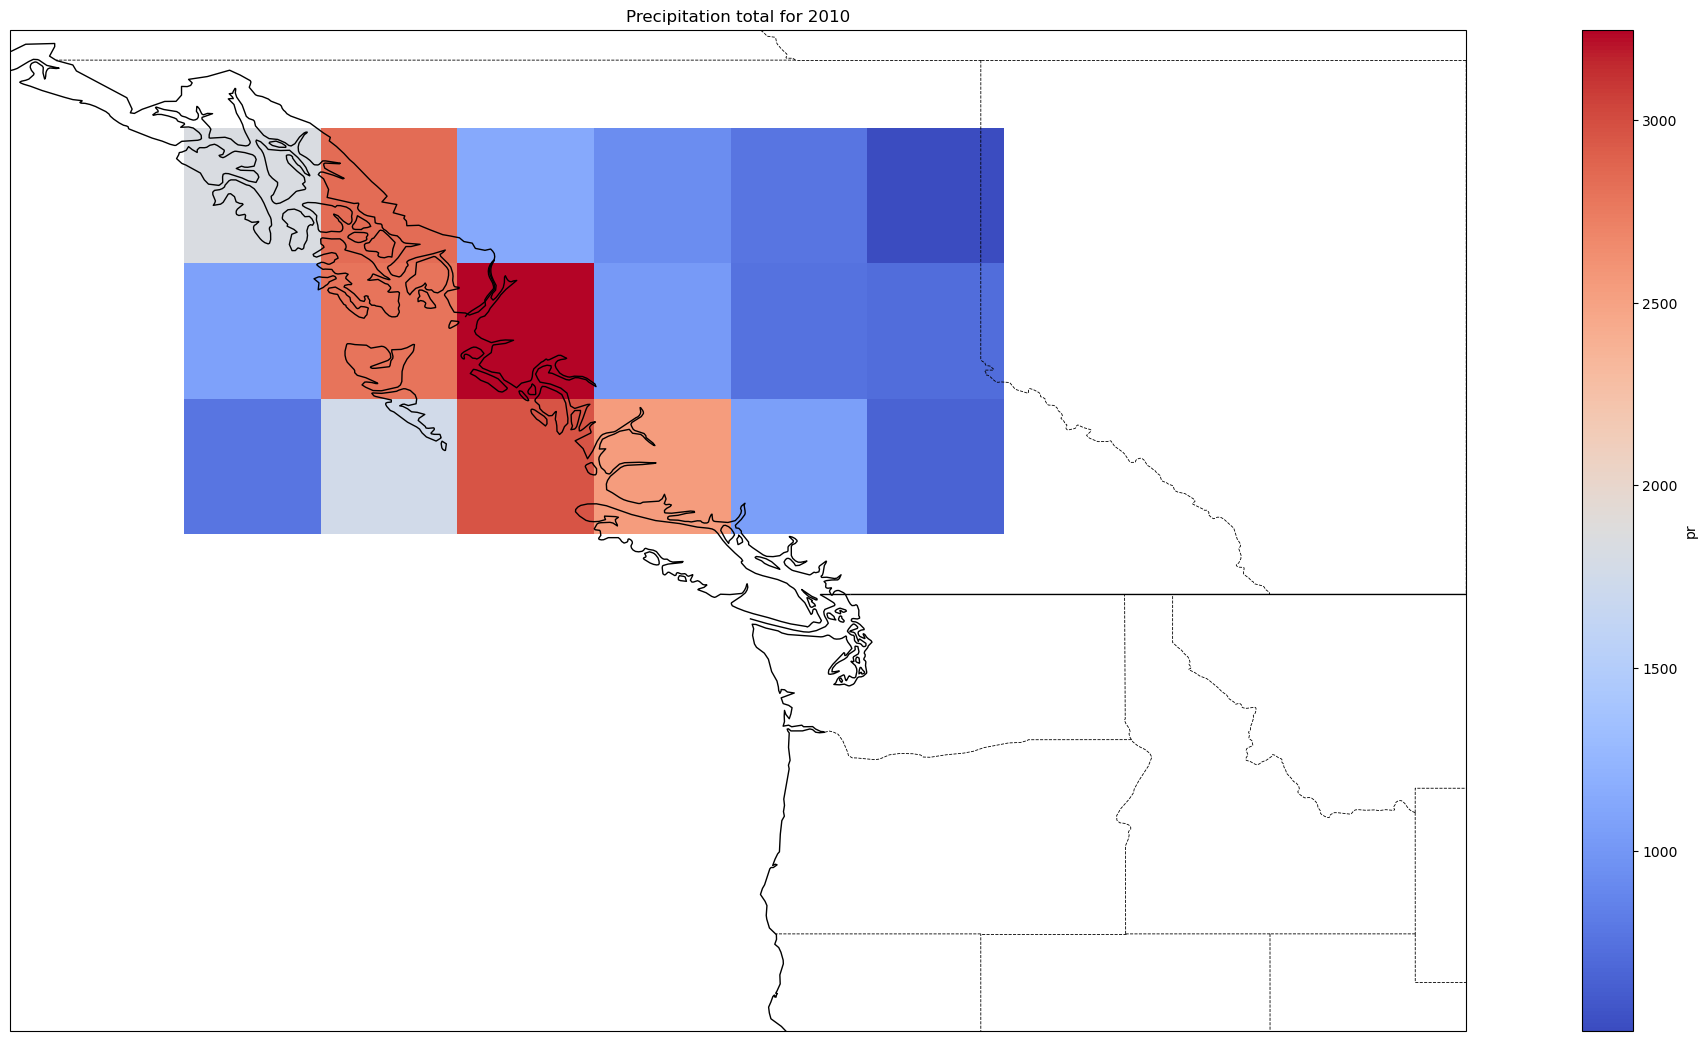

In [17]:
had_data2010 = had_out.sel(time='2100')
had_precip_data2010 = had_data2010.groupby('time.year').mean('time')*86400*365
had_precip_data2010 = had_precip_data2010.mean('member_id')

fig = plt.figure(1, figsize=[30,13])

ax2 = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax2.coastlines()
ax2.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=1)
ax2.set_extent([-140, -110, 40, 60])

resol = '50m'

provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale=resol, facecolor='none', edgecolor='k')
ax2.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)



had_precip_data2010.plot(ax=ax2,cmap='coolwarm')
ax2.title.set_text("Precipitation total for 2010")

In [14]:
regridder = xe.Regridder(gis_dset_45, ds_output, "conservative")
gis_45 = regridder(gis_dset_45.pr, keep_attrs=True)
regridder = xe.Regridder(gis_dset_85, ds_output, "conservative")
gis_85 = regridder(gis_dset_85.pr, keep_attrs=True)

## Write them to file

In [19]:
write = False
if write:
    had_out.load().to_netcdf('had_85.nc')
    gis_45.load().to_netcdf('gis_45.nc')
    gis_85.load().to_netcdf('gis_85.nc')
    can_bc_dset_85.load().to_netcdf('can_85.nc')
    can_bc_dset_45.load().to_netcdf('can_45.nc')

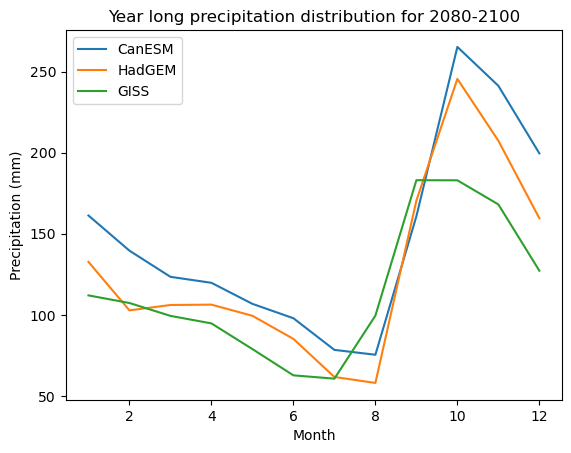

In [3]:
can_85 = xr.open_dataset('can_85.nc')
had_85 = xr.open_dataset('had_85.nc')
gis_85 = xr.open_dataset('gis_85.nc')

can_85 = can_85.sel(time=slice('2080', '2100'))
had_85 = had_85.sel(time=slice('2080', '2100'))
gis_85 = gis_85.sel(time=slice('2080', '2100'))

can_85 = can_85.groupby('time.month').mean('time').mean(['lon', 'lat'])*86400*30.4
had_85 = had_85.groupby('time.month').mean('time').mean(['lon', 'lat'])*86400*30.4
gis_85 = gis_85.groupby('time.month').mean('time').mean(['lon', 'lat'])*86400*30.4

can_85 = can_85.mean('member_id')
had_85 = had_85.mean('member_id')
gis_85 = gis_85.mean('member_id')

time = can_85.month
fig, axs = plt.subplots(1, 1)
axs.plot(time,can_85.pr, label='CanESM')
axs.plot(time, had_85.pr, label='HadGEM')
axs.plot(time, gis_85.pr, label='GISS')
axs.set_xlabel('Month')
axs.set_ylabel('Precipitation (mm)')
axs.set_title('Year long precipitation distribution for 2080-2100')
axs.legend()

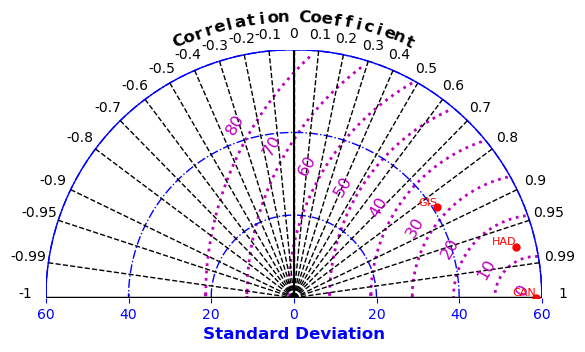

In [4]:
### Monthly correlation
import skill_metrics as sm
import numpy as np

ref = can_85.pr.to_numpy().flatten()
can = ref
had = had_85.pr.to_numpy().flatten()
gis = gis_85.pr.to_numpy().flatten()

data = {'ref': ref, 'can': can, 'had': had, 'gis':gis}

taylor_stats1 = sm.taylor_statistics(data['can'], data['ref'], 'data')
taylor_stats2 = sm.taylor_statistics(data['had'], data['ref'], 'data')
taylor_stats3 = sm.taylor_statistics(data['gis'], data['ref'], 'data')

sdev = np.array([taylor_stats1['sdev'][0], taylor_stats1['sdev'][1], 
                 taylor_stats2['sdev'][1], taylor_stats3['sdev'][1]])
crmsd = np.array([taylor_stats1['crmsd'][0], taylor_stats1['crmsd'][1], 
                  taylor_stats2['crmsd'][1], taylor_stats3['crmsd'][1]])
ccoef = np.array([taylor_stats1['ccoef'][0], taylor_stats1['ccoef'][1], 
                  taylor_stats2['ccoef'][1], taylor_stats3['ccoef'][1]])

# Specify labels for points in a cell array (M1 for model prediction 1,
# etc.). Note that a label needs to be specified for the reference even
# though it is not used.
label = ['Non-Dimensional Observation', 'CAN', 'HAD', 'GIS']

'''
Produce the Taylor diagram

Display the data points for correlations that vary from -1 to 1 (2
panels). Label the points and change the axis options for SDEV, CRMSD,
and CCOEF. Increase the upper limit for the SDEV axis and rotate the
CRMSD contour labels (counter-clockwise from x-axis). Exchange color and
line style choices for SDEV, CRMSD, and CCOEFF variables to show effect.
Increase the line width of all lines.

For an exhaustive list of options to customize your diagram, 
please call the function at a Python command line:
>> taylor_diagram
'''
sm.taylor_diagram(sdev,crmsd,ccoef,
                  numberPanels = 2,
                  markerLabel = label, markerLabelColor = 'r',
                  tickRMS = range(0,90,10), tickRMSangle = 150.0,
                  colRMS = 'm', styleRMS = ':', widthRMS = 2.0, 
                  titleRMS = 'off',
                  tickSTD = range(0, 80, 20), axismax = 60.0,
                  colSTD = 'b', styleSTD = '-.', widthSTD = 1.0,
                  colCOR = 'k', styleCOR = '--', widthCOR = 1.0)